<h3>Problem Explained</h3>

Blackwell Electronicks wants to understand how the products will have better performance on their sales, however they want it organized by product types. Therefore we need to dummyfiy our variables and proceed to a multiple regression model trainning and testing. 

Our data is the volume of sales of some of the products arleady sold in the past associated with it's type reviews, prices, profit margins and a few other variables. 

In [ ]:
library(caret)
library(mlbench)
library(corrplot)

<b>Data Explorarion and Cleaning</b>

In [90]:
#Load Data
existing_products <- read.csv('C:/Users/Francisco Cardoso/Documents/UT Data Analytics/2Predicting Customer Preferences/Task 3/Task2.3/existingproductattributes2017.csv',header = TRUE)
newproducts <- read.csv('C:/Users/Francisco Cardoso/Documents/UT Data Analytics/2Predicting Customer Preferences/Task 3/Task2.3/newproductattributes2017.csv',header = TRUE)

In [61]:
#Checking the first 6 rows of the data
head(existing_products)

ProductType,ProductNum,Price,x5StarReviews,x4StarReviews,x3StarReviews,x2StarReviews,x1StarReviews,PositiveServiceReview,NegativeServiceReview,Recommendproduct,BestSellersRank,ShippingWeight,ProductDepth,ProductWidth,ProductHeight,ProfitMargin,Volume
<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
PC,101,949.00,3,3,2,0,0,2,0,0.9,1967,25.8,23.94,6.62,16.89,0.15,12
PC,102,2249.99,2,1,0,0,0,1,0,0.9,4806,50.0,35.00,31.75,19.00,0.25,8
PC,103,399.00,3,0,0,0,0,1,0,0.9,12076,17.4,10.50,8.30,10.20,0.08,12
Laptop,104,409.99,49,19,8,3,9,7,8,0.8,109,5.7,15.00,9.90,1.30,0.08,196
Laptop,105,1079.99,58,31,11,7,36,7,20,0.7,268,7.0,12.90,0.30,8.90,0.09,232
Accessories,106,114.22,83,30,10,9,40,12,5,0.3,64,1.6,5.80,4.00,1.00,0.05,332


In [62]:
#Checking the structure of our data
str(existing_gproducts)

'data.frame':	80 obs. of  18 variables:
 $ ProductType          : Factor w/ 12 levels "Accessories",..: 7 7 7 5 5 1 1 1 1 1 ...
 $ ProductNum           : int  101 102 103 104 105 106 107 108 109 110 ...
 $ Price                : num  949 2250 399 410 1080 ...
 $ x5StarReviews        : int  3 2 3 49 58 83 11 33 16 10 ...
 $ x4StarReviews        : int  3 1 0 19 31 30 3 19 9 1 ...
 $ x3StarReviews        : int  2 0 0 8 11 10 0 12 2 1 ...
 $ x2StarReviews        : int  0 0 0 3 7 9 0 5 0 0 ...
 $ x1StarReviews        : int  0 0 0 9 36 40 1 9 2 0 ...
 $ PositiveServiceReview: int  2 1 1 7 7 12 3 5 2 2 ...
 $ NegativeServiceReview: int  0 0 0 8 20 5 0 3 1 0 ...
 $ Recommendproduct     : num  0.9 0.9 0.9 0.8 0.7 0.3 0.9 0.7 0.8 0.9 ...
 $ BestSellersRank      : int  1967 4806 12076 109 268 64 NA 2 NA 18 ...
 $ ShippingWeight       : num  25.8 50 17.4 5.7 7 1.6 7.3 12 1.8 0.75 ...
 $ ProductDepth         : num  23.9 35 10.5 15 12.9 ...
 $ ProductWidth         : num  6.62 31.75 8.3 9.9 0.3 ...
 

In [65]:
#Understanding the data
summary(existing_products)

           ProductType   ProductNum        Price         x5StarReviews   
 Accessories     :26   Min.   :101.0   Min.   :   3.60   Min.   :   0.0  
 Printer         :12   1st Qu.:120.8   1st Qu.:  52.66   1st Qu.:  10.0  
 ExtendedWarranty:10   Median :140.5   Median : 132.72   Median :  50.0  
 Software        : 6   Mean   :142.6   Mean   : 247.25   Mean   : 176.2  
 Display         : 5   3rd Qu.:160.2   3rd Qu.: 352.49   3rd Qu.: 306.5  
 PC              : 4   Max.   :200.0   Max.   :2249.99   Max.   :2801.0  
 (Other)         :17                                                     
 x4StarReviews    x3StarReviews    x2StarReviews    x1StarReviews    
 Min.   :  0.00   Min.   :  0.00   Min.   :  0.00   Min.   :   0.00  
 1st Qu.:  2.75   1st Qu.:  2.00   1st Qu.:  1.00   1st Qu.:   2.00  
 Median : 22.00   Median :  7.00   Median :  3.00   Median :   8.50  
 Mean   : 40.20   Mean   : 14.79   Mean   : 13.79   Mean   :  37.67  
 3rd Qu.: 33.00   3rd Qu.: 11.25   3rd Qu.:  7.00   3rd Qu

sum(is.na(existing_products))

In [95]:
#Removing Columns with NAs
existing_products$BestSellersRank <- NULL

In [96]:
sum(is.na(existing_products))

[1] 0

In [97]:
#Create dummy variables
new_existing_products <- dummyVars(" ~ .", data = existing_products)
new_products_rdy <- data.frame(predict(new_existing_products, newdata = existing_products))

In [ ]:
#Checking correlation and colination collinearity on the varialbles

<b>Checking for correlation and collinearity</b>

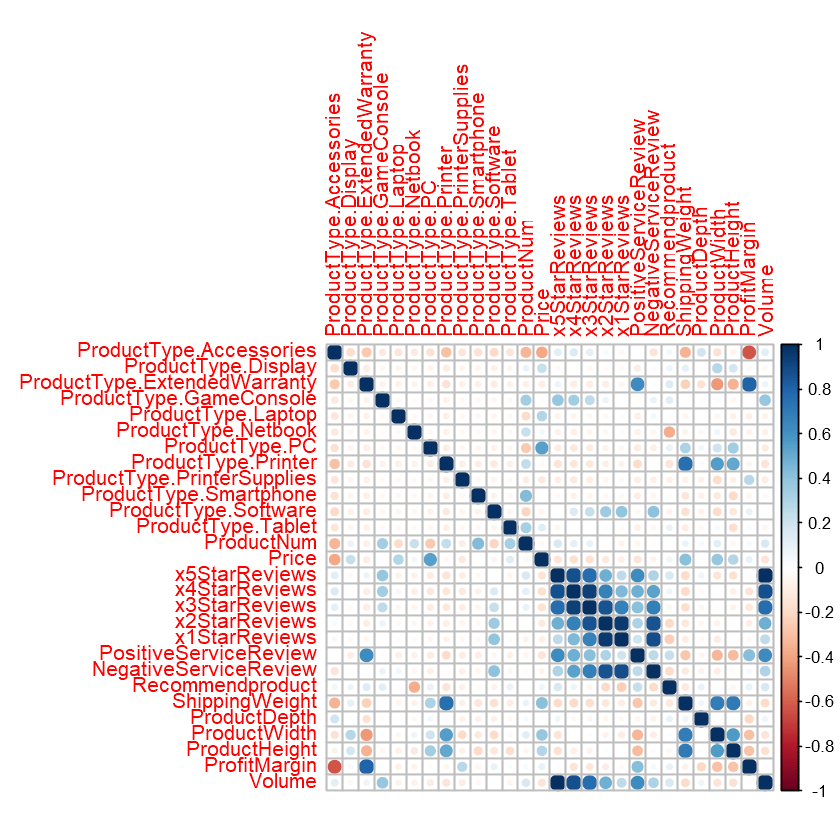

In [103]:
corrData <- cor(new_products_rdy)
corrplot(corrData)

In [107]:
#Finding out which variables are highly correlated
# find attributes that are highly corrected (ideally >0.85)

highlyCorrelated <- findCorrelation(corrData, cutoff=0.85)
# print indexes of highly correlated attributes
print(highlyCorrelated)

[1] 17 16 15 18 21


In [109]:
#Remove the highly correlated variables by index number
new_products_rdy_2 <- new_products_rdy[ -c(21,15:18) ]

In [111]:
str(new_products_rdy_2)

'data.frame':	80 obs. of  23 variables:
 $ ProductType.Accessories     : num  0 0 0 0 0 1 1 1 1 1 ...
 $ ProductType.Display         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ProductType.ExtendedWarranty: num  0 0 0 0 0 0 0 0 0 0 ...
 $ ProductType.GameConsole     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ProductType.Laptop          : num  0 0 0 1 1 0 0 0 0 0 ...
 $ ProductType.Netbook         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ProductType.PC              : num  1 1 1 0 0 0 0 0 0 0 ...
 $ ProductType.Printer         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ProductType.PrinterSupplies : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ProductType.Smartphone      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ProductType.Software        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ProductType.Tablet          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ProductNum                  : num  101 102 103 104 105 106 107 108 109 110 ...
 $ Price                       : num  949 2250 399 410 1080 ...
 $ x1StarReviews               : num  0 0 0 9 36 40 1 9 2 0 ...
 $ Pos

<b>Train and Test Models</b>

1. SVM

In [119]:
set.seed(998)
#Create a 70% 30% 
trainSize<-round(nrow(new_products_rdy_2)*0.7) #Creates train 70%
testSize<-nrow(new_products_rdy_2)-trainSize #Creates test 30%

training_indices<-sample(seq_len(nrow(new_products_rdy_2)),size =trainSize)

trainSet<-new_products_rdy_2[training_indices,]

testSet<-new_products_rdy_2[-training_indices,] 

#10 fold cross validation
fitControl <- trainControl(method = "repeatedcv", number = 10, repeats = 1)

#train the model with adjust on tuneLength
svm_Linear <- train(Volume~., data = trainSet, method = "svmPoly", trControl=fitControl, tuneLength = 5, scale = FALSE)


#training results
svm_Linear

Support Vector Machines with Polynomial Kernel 

56 samples
22 predictors

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 50, 51, 50, 52, 50, 51, ... 
Resampling results across tuning parameters:

  degree  scale  C     RMSE          Rsquared   MAE         
  1       1e-03  0.25  1.021775e+03  0.4932500  6.637462e+02
  1       1e-03  0.50  9.731401e+02  0.5038225  6.182818e+02
  1       1e-03  1.00  8.979952e+02  0.5083272  5.513127e+02
  1       1e-03  2.00  8.789173e+02  0.5229698  4.976815e+02
  1       1e-03  4.00  9.847185e+02  0.5586781  5.275673e+02
  1       1e-02  0.25  9.057535e+02  0.5389916  5.063355e+02
  1       1e-02  0.50  1.034482e+03  0.5576156  5.499431e+02
  1       1e-02  1.00  1.242158e+03  0.5664419  6.419768e+02
  1       1e-02  2.00  1.403465e+03  0.5863724  7.129967e+02
  1       1e-02  4.00  1.417843e+03  0.5943158  7.208599e+02
  1       1e-01  0.25  1.399143e+03  0.5903880  7.113226e+02
  1       1e-01  0

2. Random Forrest RFF

In [125]:
set.seed(998)
#train the model with adjust on tuneLength
RF <- train(Volume~., data = trainSet, method = "rf", trControl=fitControl, tuneLength = 5, scale = FALSE)
RF

Random Forest 

56 samples
22 predictors

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 50, 49, 49, 50, 50, 52, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
   2    824.7940  0.6326543  540.5623
   7    722.9375  0.8282316  427.7459
  12    680.3047  0.8835742  360.0696
  17    697.9471  0.8991243  346.2036
  22    747.2785  0.8988231  353.6021

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 12.

3. Obtain the model predictions

In [129]:
finalpred <- predict(RF, new_products_rdy_2)

In [128]:
output <- new_products_rdy_2
output$predictions <- finalpred
write.csv(output, file="C2.T3output.csv", row.names = TRUE)